# Task 3: Exploratory Data Analysis (EDA)

## Cài đặt chương trình

In [ ]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [11]:
db = pd.read_csv("paper.csv")

In [26]:
# db.info()
print(f"Kích thước dữ liệu ban đầu: {db.shape}")
print(f"Dữ liệu bị thiếu: {db.isnull().sum().sum()}")

print(f"\nKiểm tra dữ liệu trùng lặp:")
duplicate_count = db.duplicated().sum()
print(f"Số dòng trùng lặp hoàn toàn: {duplicate_count}")

if duplicate_count > 0:
    db = db.drop_duplicates(keep='first')
    print(f"Kích thước sau khi làm sạch: {db.shape}")
else:
    print("Không có dữ liệu trùng lặp hoàn toàn")




Kích thước dữ liệu ban đầu: (13, 33)
Dữ liệu bị thiếu: 146

Kiểm tra dữ liệu trùng lặp:
Số dòng trùng lặp hoàn toàn: 0
Không có dữ liệu trùng lặp hoàn toàn


Dựa vào những thông tin mà hàm isnull() đưa ra ta có thể thấy được rằng dữ liệu này có rất nhiều trường còn thiếu và hoàn toàn không toàn vẹn

In [23]:
db.describe().round(2)

,corpusId,title_length,title_length_without_space,title_length_in_words,abstract,abstract_length,abstract_length_without_space,abstract_length_in_words,venue_length,venue_length_without_space,...,influentialCitationCount,isOpenAccess,fieldsOfStudy,s2FieldsOfStudy_count,publicationTypes_count,author_count,embedding_dimension,embedding_mean,embedding_stddev,revised_dates_count
count,0.0,13.00,13.00,13.00,0.0,13.0,13.0,13.0,13.00,13.00,...,0.0,0.0,0.0,13.0,0.0,13.00,0.0,0.0,0.0,13.0
mean,NaN,56.23,50.00,7.23,NaN,0.0,0.0,0.0,57.92,51.62,...,NaN,NaN,NaN,0.0,NaN,4.69,NaN,NaN,NaN,0.0
std,NaN,19.63,18.12,1.88,NaN,0.0,0.0,0.0,21.70,19.07,...,NaN,NaN,NaN,0.0,NaN,2.29,NaN,NaN,NaN,0.0
min,NaN,36.00,31.00,5.00,NaN,0.0,0.0,0.0,24.00,21.00,...,NaN,NaN,NaN,0.0,NaN,1.00,NaN,NaN,NaN,0.0
25%,NaN,41.00,35.00,6.00,NaN,0.0,0.0,0.0,37.00,34.00,...,NaN,NaN,NaN,0.0,NaN,3.00,NaN,NaN,NaN,0.0
50%,NaN,46.00,41.00,7.00,NaN,0.0,0.0,0.0,73.00,63.00,...,NaN,NaN,NaN,0.0,NaN,4.00,NaN,NaN,NaN,0.0
75%,NaN,63.00,57.00,8.00,NaN,0.0,0.0,0.0,73.00,65.00,...,NaN,NaN,NaN,0.0,NaN,7.00,NaN,NaN,NaN,0.0
max,NaN,89.00,79.00,11.00,NaN,0.0,0.0,0.0,86.00,78.00,...,NaN,NaN,NaN,0.0,NaN,9.00,NaN,NaN,NaN,0.0



year distrubution
Papers by year:
year
2014    1
2015    1
2016    1
2017    3
2019    2
2020    2
2021    2
2022    1
Name: count, dtype: int64


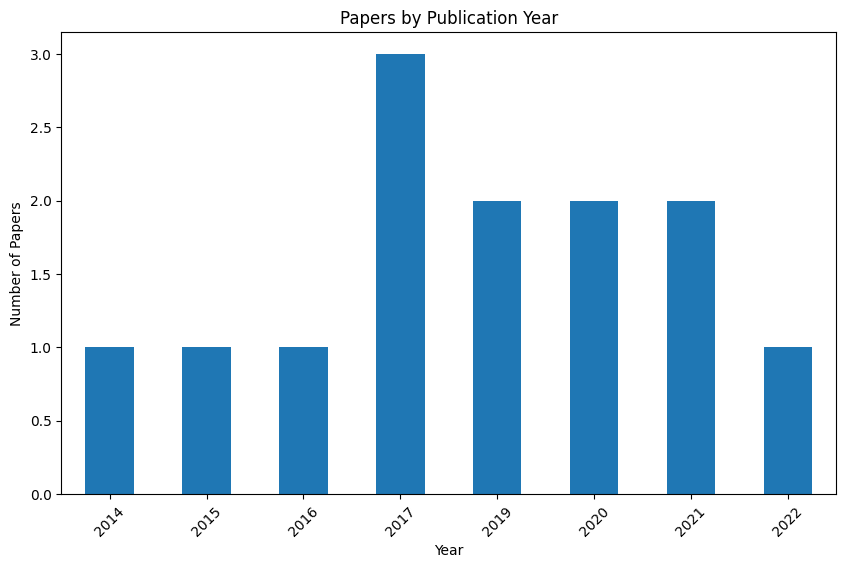

In [27]:
print(f"\nyear distrubution")
year_counts = db['year'].value_counts(dropna=False).sort_index()
print("Papers by year:")
print(year_counts)

plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Papers by Publication Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()

Dữ liệu cho thầy năm 2017 có số lượng bài được công bố nhiều nhất, tuy nhiên có thể thấy các bài báo được đăng khá thường xuyên qua các năm